In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import scipy.stats as ss
import re
import numpy as np
py.tools.set_credentials_file(username='pwendel3',api_key='cQ3tM6k1HeueTNWy7QlX')
%matplotlib inline

In [23]:
nfldat=pd.read_csv('nfl2017.csv')
nfldat.head()

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,PtsW,PtsL,YdsW,TOW,YdsL,TOL
0,1,Thu,September 7,8:30PM,Kansas City Chiefs,@,New England Patriots,boxscore,42.0,27.0,537.0,1.0,371.0,0.0
1,1,Sun,September 10,1:00PM,Oakland Raiders,@,Tennessee Titans,boxscore,26.0,16.0,359.0,0.0,350.0,0.0
2,1,Sun,September 10,1:00PM,Atlanta Falcons,@,Chicago Bears,boxscore,23.0,17.0,372.0,0.0,301.0,0.0
3,1,Sun,September 10,1:00PM,Buffalo Bills,NaN,New York Jets,boxscore,21.0,12.0,408.0,1.0,214.0,2.0
4,1,Sun,September 10,1:00PM,Pittsburgh Steelers,@,Cleveland Browns,boxscore,21.0,18.0,290.0,1.0,237.0,1.0


In [24]:
nfldat['ppyW']=nfldat['PtsW']/nfldat['YdsW']
nfldat['ppyL']=nfldat['PtsL']/nfldat['YdsL']

In [25]:
print(nfldat.sort_values('ppyW',ascending=False).head())
print(nfldat.sort_values('ppyL',ascending=False).head())

    Week  Day          Date    Time          Winner/tie Unnamed: 5  \
236   16  Sun   December 24  4:25PM    Seattle Seahawks          @   
176   13  Thu   November 30  8:25PM      Dallas Cowboys        NaN   
83     6  Sun    October 15  1:00PM  New Orleans Saints        NaN   
106    8  Thu    October 26  8:25PM    Baltimore Ravens        NaN   
47     4  Thu  September 28  8:25PM   Green Bay Packers        NaN   

               Loser/tie Unnamed: 7  PtsW  PtsL   YdsW  TOW   YdsL  TOL  \
236       Dallas Cowboys   boxscore  21.0  12.0  136.0  0.0  282.0  3.0   
176  Washington Redskins   boxscore  38.0  14.0  275.0  0.0  280.0  4.0   
83         Detroit Lions   boxscore  52.0  38.0  379.0  3.0  347.0  5.0   
106       Miami Dolphins   boxscore  40.0   0.0  295.0  0.0  196.0  2.0   
47         Chicago Bears   boxscore  35.0  14.0  260.0  0.0  308.0  4.0   

         ppyW      ppyL  
236  0.154412  0.042553  
176  0.138182  0.050000  
83   0.137203  0.109510  
106  0.135593  0.000000 

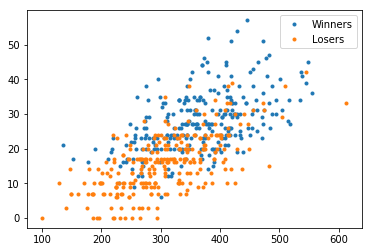

In [26]:
plt.plot(nfldat['YdsW'],nfldat['PtsW'],'.')
plt.plot(nfldat['YdsL'],nfldat['PtsL'],'.')
plt.legend(['Winners','Losers'])

In [27]:
nfldat.sort_values('YdsL',ascending=False)

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,PtsW,PtsL,YdsW,TOW,YdsL,TOL,ppyW,ppyL
267,SuperBowl,Sun,February 4,6:30PM,Philadelphia Eagles,@,New England Patriots,boxscore,41.0,33.0,538.0,1.0,613.0,1.0,0.076208,0.053834
263,Division,Sun,January 14,1:05PM,Jacksonville Jaguars,@,Pittsburgh Steelers,boxscore,45.0,42.0,378.0,0.0,545.0,2.0,0.119048,0.077064
115,8,Sun,October 29,4:05PM,Seattle Seahawks,NaN,Houston Texans,boxscore,41.0,38.0,479.0,1.0,509.0,3.0,0.085595,0.074656
217,15,Sun,December 17,1:00PM,Philadelphia Eagles,@,New York Giants,boxscore,34.0,29.0,341.0,0.0,504.0,1.0,0.099707,0.057540
117,8,Sun,October 29,8:30PM,Pittsburgh Steelers,@,Detroit Lions,boxscore,20.0,15.0,392.0,2.0,482.0,1.0,0.051020,0.031120
184,13,Sun,December 3,1:00PM,New York Jets,NaN,Kansas City Chiefs,boxscore,38.0,31.0,488.0,0.0,474.0,0.0,0.077869,0.065401
235,16,Sun,December 24,4:05PM,San Francisco 49ers,NaN,Jacksonville Jaguars,boxscore,44.0,33.0,369.0,1.0,472.0,3.0,0.119241,0.069915
153,11,Sun,November 19,1:00PM,New Orleans Saints,NaN,Washington Redskins,boxscore,34.0,31.0,535.0,1.0,456.0,0.0,0.063551,0.067982
154,11,Sun,November 19,1:00PM,Tampa Bay Buccaneers,@,Miami Dolphins,boxscore,30.0,20.0,321.0,0.0,448.0,5.0,0.093458,0.044643
92,7,Sun,October 22,1:00PM,Buffalo Bills,NaN,Tampa Bay Buccaneers,boxscore,30.0,27.0,434.0,1.0,447.0,3.0,0.069124,0.060403


In [28]:
teamsin=nfldat['Loser/tie'].unique()
teamtup=[]

yardso=[]
yardsd=[]
weeks=[]
teams=[]
weekrankos=[]
weekrankds=[]
wl=[]
for team in teamsin:
    yardsot=[]
    yardsdt=[]
    teamdat=nfldat[(nfldat['Winner/tie']==team)|(nfldat['Loser/tie']==team)]
    #print(teamdat)
    for i,game in teamdat.iterrows():
        #print(game)
        if re.search('[0-9]+',game['Week']):
            if game['Winner/tie']==team:
                yardsot.append(game['YdsW'])
                yardsdt.append(game['YdsL'])
                wl.append(True)
            else:
                yardsot.append(game['YdsL'])
                yardsdt.append(game['YdsW'])
                wl.append(False)
            weeks.append(game['Week'])
            teams.append(team)
    weekranko=ss.rankdata([yard for yard in yardsot])
    #print(weekranko)
    weekrankd=ss.rankdata([-yard for yard in yardsdt])
    weekrankos.extend(weekranko)
    weekrankds.extend(weekrankd)
    yardso.extend(yardsot)
    yardsd.extend(yardsdt)
#teamtup=(teams,weeks,yardso,weekranko,yardsd,weekrankd,wl)) 

In [29]:
len(teams)
weekrankos

[4.0,
 16.0,
 7.5,
 5.0,
 9.0,
 6.0,
 10.0,
 12.0,
 7.5,
 14.0,
 13.0,
 15.0,
 1.0,
 3.0,
 11.0,
 2.0,
 11.0,
 13.0,
 15.0,
 2.0,
 1.0,
 16.0,
 6.0,
 5.0,
 14.0,
 8.0,
 7.0,
 10.0,
 3.0,
 9.0,
 12.0,
 4.0,
 7.0,
 11.0,
 8.0,
 10.0,
 6.0,
 13.0,
 3.0,
 9.0,
 12.0,
 15.0,
 1.0,
 2.0,
 16.0,
 14.0,
 5.0,
 4.0,
 3.0,
 5.0,
 12.0,
 15.0,
 2.0,
 14.0,
 6.0,
 8.0,
 11.0,
 7.0,
 13.0,
 16.0,
 1.0,
 9.0,
 10.0,
 4.0,
 3.0,
 13.0,
 11.0,
 2.0,
 16.0,
 4.0,
 8.0,
 7.0,
 15.0,
 1.0,
 14.0,
 9.0,
 10.0,
 6.0,
 5.0,
 12.0,
 5.0,
 8.0,
 9.0,
 11.0,
 16.0,
 3.0,
 7.0,
 1.0,
 10.0,
 4.0,
 14.0,
 12.0,
 6.0,
 2.0,
 15.0,
 13.0,
 5.0,
 11.0,
 16.0,
 9.0,
 14.0,
 10.0,
 7.0,
 4.0,
 13.0,
 15.0,
 8.0,
 6.0,
 2.0,
 3.0,
 12.0,
 1.0,
 9.0,
 15.0,
 11.0,
 13.5,
 8.0,
 16.0,
 1.0,
 13.5,
 6.0,
 7.0,
 12.0,
 10.0,
 3.0,
 4.0,
 5.0,
 2.0,
 2.0,
 5.0,
 14.0,
 15.0,
 13.0,
 10.0,
 16.0,
 7.0,
 6.0,
 11.0,
 8.0,
 12.0,
 9.0,
 1.0,
 4.0,
 3.0,
 1.0,
 8.0,
 14.0,
 5.0,
 16.0,
 12.0,
 4.0,
 13.0,
 15.0,
 9.0,
 7.0,
 1

In [43]:
rankdf=pd.DataFrame({'team':teams,'week':weeks,'yardso':yardso,'weekranko':weekrankos,'yardsd':yardsd,'weekrankd':weekrankds})


In [44]:
rankdf

,team,week,weekrankd,weekranko,yardsd,yardso
0,New England Patriots,1,1.0,4.0,537.0,371.0
1,New England Patriots,2,3.0,16.0,429.0,555.0
2,New England Patriots,3,4.0,7.5,417.0,396.0
3,New England Patriots,4,2.0,5.0,444.0,373.0
4,New England Patriots,5,6.0,9.0,409.0,402.0
5,New England Patriots,6,7.0,6.0,408.0,375.0
6,New England Patriots,7,11.0,10.0,343.0,403.0
7,New England Patriots,8,9.0,12.0,349.0,414.0
8,New England Patriots,10,12.0,7.5,339.0,396.0
9,New England Patriots,11,10.0,14.0,344.0,421.0


In [33]:
nfldat=pd.merge(nfldat,rankdf,left_on=['Winner/tie','Week'],right_on=['team','week'])
nfldat=pd.merge(nfldat,rankdf,left_on=['Loser/tie','Week'],right_on=['team','week'],suffixes=['_win','_lose'])

In [34]:
nfldat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 255
Data columns (total 24 columns):
Week              256 non-null object
Day               256 non-null object
Date              256 non-null object
Time              256 non-null object
Winner/tie        256 non-null object
Unnamed: 5        111 non-null object
Loser/tie         256 non-null object
Unnamed: 7        256 non-null object
PtsW              256 non-null float64
PtsL              256 non-null float64
YdsW              256 non-null float64
TOW               256 non-null float64
YdsL              256 non-null float64
TOL               256 non-null float64
ppyW              256 non-null float64
ppyL              256 non-null float64
team_win          256 non-null object
week_win          256 non-null object
weekrankd_win     256 non-null float64
weekranko_win     256 non-null float64
team_lose         256 non-null object
week_lose         256 non-null object
weekrankd_lose    256 non-null float64
weekranko_

In [35]:
dranks=[]
oranks=[]
weeks=[]
teams=[]

for team in teamsin:
    teamdat=nfldat[(nfldat['Winner/tie']==team)|(nfldat['Loser/tie']==team)]
    orankst=[]
    drankst=[]
    for i,game in teamdat.iterrows():
        if game['Winner/tie']==team:
            orankst.append(game.weekrankd_lose)
            drankst.append(game.weekranko_lose)
        else:
            orankst.append(game.weekrankd_win)
            drankst.append(game.weekranko_win)
        teams.append(team)
        weeks.append(game['Week'])
    
    dranks.extend(drankst)
    oranks.extend(orankst)

In [36]:
seasrankdf=pd.DataFrame({'team':teams,'week':weeks,'drank':dranks,'orank':oranks})


In [37]:
pd.DataFrame({'team':teams,'week':weeks,'drank':dranks,'orank':oranks})

,drank,orank,team,week
0,16.0,7.0,New England Patriots,1
1,13.0,1.0,New England Patriots,2
2,14.0,6.0,New England Patriots,3
3,15.0,5.0,New England Patriots,4
4,12.0,9.0,New England Patriots,5
5,14.0,8.0,New England Patriots,6
6,6.5,1.0,New England Patriots,7
7,7.0,2.0,New England Patriots,8
8,10.0,2.0,New England Patriots,10
9,9.0,4.0,New England Patriots,11


In [38]:
seasrankdf.groupby('team').agg({'drank' : ['min', 'max','mean'], 'orank' : ['min', 'max','mean']})

drank                 orank                
                       min   max      mean   min   max      mean
team                                                            
Arizona Cardinals      1.0  14.0   7.28125   6.0  15.0   9.96875
Atlanta Falcons        1.0  14.0   6.62500   1.0  11.0   6.56250
Baltimore Ravens       2.0  16.0   9.06250   2.0  16.0   9.96875
Buffalo Bills          1.0  16.0  10.18750   4.5  15.5  11.00000
Carolina Panthers      1.0  16.0   6.68750   1.0  16.0   9.71875
Chicago Bears          1.0  13.0   7.18750   1.0  16.0  11.00000
Cincinnati Bengals     2.0  16.0   9.18750   4.0  16.0  11.09375
Cleveland Browns       2.0  15.0   8.84375   2.0  16.0   9.40625
Dallas Cowboys         1.0  16.0   7.65625   1.0  16.0   9.31250
Denver Broncos         1.0  14.0   5.93750   4.0  15.5  10.34375
Detroit Lions          3.0  15.0  10.87500   1.0  15.0   7.37500
Green Bay Packers      1.0  15.0   9.81250   4.0  16.0   9.62500
Houston Texans         2.0  16.0   9.09375   1.0  16.0   9.15625
Indianapolis Colts     3.0  16.0  10.50000   3.0  15.0  11.28125
Jacksonville Jaguars   1.0  15.0   6.06250   1.0  15.0   6.87500
Kansas City Chiefs     3.0  16.0   9.21875   1.0  14.0   5.90625
Los Angeles Chargers   2.0  15.0   8.09375   1.0  14.0   6.81250
Los Angeles Rams       1.0  16.0   8.87500   1.0  15.0   6.40625
Miami Dolphins         1.0  16.0   8.06250   3.0  16.0  10.59375
Minnesota Vikings      1.0  13.0   4.68750   2.0  14.0   7.21875
New England Patriots   4.0  16.0  10.31250   1.0  15.0   5.25000
New Orleans Saints     1.0  16.0   8.25000   1.0  11.0   5.12500
New York Giants        1.0  16.0   9.93750   1.0  16.0   9.87500
New York Jets          2.0  16.0   9.31250   1.0  16.0  10.68750
Oakland Raiders        1.0  16.0   9.56250   1.0  16.0   8.93750
Philadelphia Eagles    1.0  16.0   7.03125   1.0  15.5   6.78125
Pittsburgh Steelers    2.0  16.0   7.37500   1.0  13.0   6.06250
San Francisco 49ers    2.0  16.0  10.06250   1.0  14.0   6.93750
Seattle Seahawks       2.0  16.0   7.68750   1.0  16.0   7.93750
Tampa Bay Buccaneers   2.0  16.0  10.96875   2.0  15.0   6.12500
Tennessee Titans       1.0  15.0   8.75000   3.0  16.0   9.50000
Washington Redskins    1.0  16.0   8.81250   1.0  16.0   9.15625

In [39]:
#georank=seasrankdf.groupby('team').agg({'drank' :np.mean, 'orank' :np.mean})

In [40]:
georank=seasrankdf.groupby('team').agg({'drank' :ss.mstats.gmean, 'orank' :ss.mstats.gmean})

In [41]:
georank.sort_values('orank')

,drank,orank
team,,
New Orleans Saints,6.302047,3.746843
New England Patriots,9.399526,4.003446
Philadelphia Eagles,5.302275,4.449380
Kansas City Chiefs,8.161273,4.606791
Los Angeles Chargers,7.033247,4.905222
Tampa Bay Buccaneers,9.314035,4.915380
Pittsburgh Steelers,5.964914,4.931271
Jacksonville Jaguars,3.854313,5.104575
Los Angeles Rams,6.661079,5.278192


In [42]:
georank.sort_values('drank',ascending=)

,drank,orank
team,,
Minnesota Vikings,3.588097,6.004902
Jacksonville Jaguars,3.854313,5.104575
Denver Broncos,4.517125,9.608774
Carolina Panthers,4.922596,7.700924
Atlanta Falcons,5.199368,5.573674
Philadelphia Eagles,5.302275,4.449380
Pittsburgh Steelers,5.964914,4.931271
Seattle Seahawks,6.032105,5.864423
Arizona Cardinals,6.082378,9.493166


In [49]:
yardmean=rankdf.groupby('team').agg({'yardso':np.mean,'yardsd':np.mean})

In [53]:
seasonagg=pd.merge(yardmean,georank,left_index=True,right_index=True)

team
Arizona Cardinals       314.4375
Atlanta Falcons         364.8125
Baltimore Ravens        305.3750
Buffalo Bills           302.6250
Carolina Panthers       323.6875
Chicago Bears           287.4375
Cincinnati Bengals      280.5000
Cleveland Browns        308.8750
Dallas Cowboys          331.9375
Denver Broncos          324.0625
Detroit Lions           337.7500
Green Bay Packers       305.6875
Houston Texans          320.0000
Indianapolis Colts      284.5625
Jacksonville Jaguars    365.9375
Kansas City Chiefs      375.4375
Los Angeles Chargers    376.6250
Los Angeles Rams        361.5000
Miami Dolphins          307.6875
Minnesota Vikings       356.8750
New England Patriots    394.1875
New Orleans Saints      391.1875
New York Giants         314.2500
New York Jets           305.2500
Oakland Raiders         324.0625
Philadelphia Eagles     365.7500
Pittsburgh Steelers     377.9375
San Francisco 49ers     349.1875
Seattle Seahawks        330.3750
Tampa Bay Buccaneers    363.3750
Tenne